## Heuristic Model - fraud

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("PCA_standardized.csv")

In [3]:
train_data = df.iloc[:,1:]
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.001597,-0.099493,-0.062586,0.055364,0.063748,-0.078686,-0.074330,-0.001329
1,3.334907,17.051728,7.791509,1.202956,-5.870208,7.478103,9.150227,-0.355868
2,0.008796,0.098246,-0.045428,-0.088565,0.014162,-0.077065,-0.093301,-0.003220
3,0.063701,-0.074574,-0.082023,0.040459,0.121016,0.037284,-0.107443,0.016966
4,11.512157,-4.585651,-2.718350,5.188391,12.505159,24.322964,-6.417228,5.572582


In [4]:
train = train_data.values

In [5]:
train = pd.DataFrame(train)

In [6]:
train.head()

,0,1,2,3,4,5,6,7
0,-0.001597,-0.099493,-0.062586,0.055364,0.063748,-0.078686,-0.074330,-0.001329
1,3.334907,17.051728,7.791509,1.202956,-5.870208,7.478103,9.150227,-0.355868
2,0.008796,0.098246,-0.045428,-0.088565,0.014162,-0.077065,-0.093301,-0.003220
3,0.063701,-0.074574,-0.082023,0.040459,0.121016,0.037284,-0.107443,0.016966
4,11.512157,-4.585651,-2.718350,5.188391,12.505159,24.322964,-6.417228,5.572582


In [7]:
#Calculating Heuristic Z score for each record - Manhattan
manhattan = train.abs()
manhattan_score = manhattan.sum(axis = 1)
#manhattan_score

In [8]:
manhattan_score.shape

(1070994,)

In [9]:
#Calculating Heuristic Z score for each record - Euclidean
euclidean = ((train.abs())**2).sum(axis=1)
euclidean_score = euclidean**(1/2)
euclidean_score.shape

(1070994,)

In [10]:
#Creating DF
manhattan_score = pd.DataFrame(manhattan_score)
euclidean_score = pd.DataFrame(euclidean_score)
fraud_score_HU= pd.concat([manhattan_score,euclidean_score], axis=1)

fraud_score_HU.columns=['Manhattan_Hu_Score','Euclidean_Hu_Score']

In [11]:
fraud_score_HU.insert(0,'Record',fraud_score_HU.index+1)

In [12]:
fraud_score_HU.columns=['Record','Manhattan_Hu_Score','Euclidean_Hu_Score']

In [13]:
fraud_score_HU.head()

,Record,Manhattan_Hu_Score,Euclidean_Hu_Score
0,1,0.437133,0.180736
1,2,52.235506,23.200698
2,3,0.428782,0.185720
3,4,0.543465,0.214127
4,5,72.822482,31.750383


In [14]:
fraud_score_HU['Euclidean_Hu_Rank'] = fraud_score_HU['Euclidean_Hu_Score'].rank(ascending=1)
fraud_score_HU['Manhattan_Hu_Rank'] = fraud_score_HU['Manhattan_Hu_Score'].rank(ascending=1)

In [15]:
fraud_score_HU.head()

,Record,Manhattan_Hu_Score,Euclidean_Hu_Score,Euclidean_Hu_Rank,Manhattan_Hu_Rank
0,1,0.437133,0.180736,708335.0,718838.0
1,2,52.235506,23.200698,1070323.0,1070305.0
2,3,0.428782,0.185720,718343.0,712667.0
3,4,0.543465,0.214127,795351.0,834627.0
4,5,72.822482,31.750383,1070394.0,1070395.0


In [16]:
fraud_score_HU.to_csv('fraud_ScoreAndRanks_HU.csv',index=False)

## Plotting

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

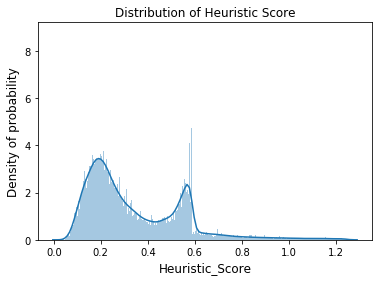

In [22]:
colName='Manhattan_Hu_Score'

xhigh =1.25
#sns.plt.xlim(0,xhigh)

#temp = fraud_score_HU
temp = fraud_score_HU[fraud_score_HU[colName] <= xhigh]


sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of Heuristic Score')
#plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel('Heuristic_Score', fontsize=12)
plt.savefig("Heuristic_Score.png")
plt.show()

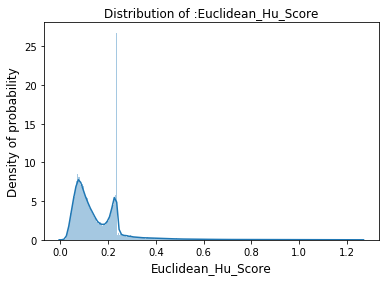

In [20]:
colName='Euclidean_Hu_Score'

xhigh =1.25
#sns.plt.xlim(0,xhigh)

#temp = fraud_score_HU
temp = fraud_score_HU[fraud_score_HU[colName] <= xhigh]


sns.distplot(temp[colName],bins=10000, kde=True)
plt.title('Distribution of :'+colName)
#plt.xscale('log')
plt.ylabel('Density of probability', fontsize=12)
#plt.ylim((0.00, 25)) 
#plt.xlim((0.00, 25)) 
plt.xlabel(colName, fontsize=12)
plt.savefig("Euclidean_Hu_Score.png")
plt.show()